# Understanding Residential Mortgage-Backed Securities

#### A python code version of part II of Frank Fabozzi's book:  "Investing in Mortgage-Backed and Asset-Backed Securities."

## Chp 1. Understanding Mortgage Lending and Loans

### 1.1 Classification of Real Estate

-> Residential real estate
   1. Primary Residence
   2. Secondary Residence

-> Commercial real estate
   1. Farm
   2. Commercial Retail/Offices
   3. Commercial Residential
   4. Hospitality
   5. Health etc.
   

### 1.2 Underwriting

#### 1.2.1 Residential Mortgage Origination and Underwriting

1. Borrower’s willingness to repay
   1. Credit score
   2. Repayment history

2. Borrower’s ability to repay
   1. Credit lines outstanding
   2. Debt to income ratio (Front End DTI/Back End DTI) 
      -> Front-end ratio measures the mortgage payment
      -> Back-end ratio measures the mortgage payment plus other housing expenses, taxes, insurance, utilities, and maintenance

#### Homeowners Equity

In [1]:
# Can be scraped from any Property dealing website too
MV = int(input("Enter Market Value of Property: "))

# Need Customers Data to calculate this
CB = int(input("Enter Outstanding Current Balance of the Loan: "))


Enter Market Value of Property: 200000
Enter Outstanding Current Balance of the Loan: 120000


In [2]:
HE = MV - CB
print("Homeowner’s equity = " + str(HE))

HER = HE/CB
print("Homeowner’s equity% = " + str(HER))

LTV = CB/MV
print("Loan To Value = " + str(LTV))


Homeowner’s equity = 80000
Homeowner’s equity% = 0.6666666666666666
Loan To Value = 0.6


#### Loss severity

In [3]:
# Need Customers Data to calculate this
LP = float(input("Enter Liquidation Proceeds: "))

Enter Liquidation Proceeds: 144000


In [4]:
LS = (LP-CB)/CB
print("Loss Severity = " + str(LS))

#del(HE,HER,MV,CB,LTV,LS,LP)

Loss Severity = 0.2


#### 1.2.2 Commercial Mortgage Origination and Underwriting

Commercial Property combines a bunch of different loans to fund it's operations

Loan to Cost Ratio - The ratio of the construction loan to the total cost of the construction project

Debt service coverage ratio - The net operating income is the income produced from a commercial property “net” of all operating expenses

Capitalization rate - Investor’s return on his/her money

In [5]:
# Need Loan Data to calculate this
CCB = float(input("Enter Outstanding Current Balance of the Loan: "))

#Can be obtained from Balance sheet
CL = float(input("Enter Construction Costs: "))
TPC = float(input("Enter Total Project Costs: "))
NOI = float(input("Enter Net Operating Income: "))
TDS = float(input("Enter Total Debt Service: "))
P = float(input("Enter Purchase Price: "))

#Calc
CLTV = CCB/MV
print("Loan To Value = " + str(CLTV))

LTC = CL/TPC
print("Loan To Cost = " + str(LTC))

DSCR = NOI/TDS
print("Debt service coverage = " + str(DSCR))

Cap = NOI/P
print("Cap Rate = " + str(Cap))



Enter Outstanding Current Balance of the Loan: 3000000
Enter Construction Costs: 20000
Enter Total Project Costs: 60000
Enter Net Operating Income: 130000
Enter Total Debt Service: 10000
Enter Purchase Price: 375000
Loan To Value = 15.0
Loan To Cost = 0.3333333333333333
Debt service coverage = 13.0
Cap Rate = 0.3466666666666667


#### 1.2.3 Residential Mortgage Loan Amortization

Creating the Amortization table

In [7]:
# Input Loan details

M = int(input("Enter Original Balance: "))
n = int(input("Enter Term in Months: "))
im = (float(input("Enter Annual Interest rate %: ")))/1200


Enter Original Balance: 200000
Enter Term in Months: 360
Enter Annual Interest rate %: 4.5


In [8]:

MP = M * im * ((im + 1)**(n)) * (1/((im+1)**(n) - 1))

print("The monthly payment is " + str(MP))


The monthly payment is 1013.3706196517716


In [9]:
import pandas as pd
import copy

Table = []
BB = M

for t in range(n):
    M1 = BB
    SCI = BB*im
    SCP = MP - SCI
    BB = BB*(1+im) - MP
    
    A = [1+t, M1, MP, SCI, SCP, BB]
    
    Table.append(A)

df = pd.DataFrame(Table,columns=['Period','Begin Balance', 'Montly', 'SCI', 'SCP', 'Ending Balance'])
print(df.to_string(index=False))
    
    
    

 Period  Begin Balance      Montly         SCI          SCP  Ending Balance
      1  200000.000000  1013.37062  750.000000   263.370620    1.997366e+05
      2  199736.629380  1013.37062  749.012360   264.358259    1.994723e+05
      3  199472.271121  1013.37062  748.021017   265.349603    1.992069e+05
      4  199206.921518  1013.37062  747.025956   266.344664    1.989406e+05
      5  198940.576854  1013.37062  746.027163   267.343456    1.986732e+05
      6  198673.233398  1013.37062  745.024625   268.345994    1.984049e+05
      7  198404.887403  1013.37062  744.018328   269.352292    1.981355e+05
      8  198135.535111  1013.37062  743.008257   270.362363    1.978652e+05
      9  197865.172748  1013.37062  741.994398   271.376222    1.975938e+05
     10  197593.796526  1013.37062  740.976737   272.393883    1.973214e+05
     11  197321.402644  1013.37062  739.955260   273.415360    1.970480e+05
     12  197047.987284  1013.37062  738.929952   274.440667    1.967735e+05
     13  196

#### 1.2.4 Mortgage Servicing  
-> Loan Maintenance  
-> Loan Administration  
-> Delinquency Management and Loss Mitigation  

## Chp 2. Modeling Cash Flows

The investor in a MBS transaction is exposed to prepayment risk, or the
early termination of the loan.

-> Voluntary Repayment (Refinancing, Turnover)  
-> Involuntary Repayment (Life Event, Strategic)

### 2.1 Prepayment Conventions

#### Single monthly mortality rate (SMM) 
Single monthly mortality rate (SMM) measures the percentage of a pool’s principal balance that has prepaid in the current month

#### Conditional Prepayment Rate(CPR) - An annualized measure

Public Securities Association Model - Specifies the mortgage prepayment loan age (seasoning) function as follows:
CPR = 1 − 100 * (1 − SMM)^12
Begins at 0.2% CPR ---> Increases by 0.2% p.m. ---> Reaches Max 6%


In [10]:
# Function for SMM using PSA Model

def SMM(t):
    cpr = 0.002 + t*0.002
    
    if cpr < 0.06:
        return (1 - (1 - cpr)**(1/12))
    else:
        return (1 - (1 - 0.06)**(1/12))


#### Prospectus Prepayment Curve, PPC - 
Issuers of non-agency residential MBS typically price their transactions using a generalization of the PSA model
Prospectus prepayment curve was created to provide dealers with
greater deal pricing flexibility than that provided by PSA assumption.
The use of the PPC is more prevalent in the non-agency MBS sector.

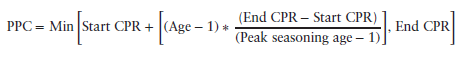

### 2.2 Modeling MBS Cash Flows

■ Original balance of the mortgage  
■ Borrower’s note rate  
■ Term of the mortgage  
■ Loan age

#### 2.2.1 0% PPC Assumption—No Prepayment

In the absence of prepayments, the investor receives a level cash flow
over the life of the pool.
A greater share of the mortgage payment consists of interest. As the loans underlying the pool amortize, the share of scheduled principal, as a percentage of the borrower’s scheduled payment, increases.

Calculated with the same code used to calculated Mortgage.

#### 2.2.2 100% PPC Assumption

The borrower’s option to prepay his loan at anytime alters the timing of the
cash flows received by the investor because prepayments are passed through
as the unscheduled return of principal.

#### 2.2.3 Applying Prepayment Assumptions
Creating the table using the assumptions undertook  


In [11]:
# Input Loan details
M = int(input("Enter Original Balance: "))
n = int(input("Enter Term in Months: "))
im = (float(input("Enter Annual Interest rate (Net) %: ")))/1200
ig = (float(input("Enter Annual Interest rate (Gross) %: ")))/1200

Enter Original Balance: 100000
Enter Term in Months: 360
Enter Annual Interest rate (Net) %: 4
Enter Annual Interest rate (Gross) %: 4.75


In [12]:
Table = []
BB = M

for t in range(n+1):
    M1 = BB
    
    II = BB*im
    
    SCP = BB*(0.455897909784331 * (360-t-1) + 198.45833333333334)/(360*359)
    
    S = SMM(int(t))
    
    PP = (S * BB)/(1+im)
    
    Ser = (ig - im)/3 * M1
    
    PMI = (ig - im)/3 * M1
    
    GF = (ig - im)/3 * M1
    
    BB = M1 - SCP - II - Ser*3 - PP
    
    A = [1+t, M1, SCP, PP, II, Ser, PMI, GF, BB]
    
    Table.append(A)

df = pd.DataFrame(Table,columns=['Period','Begin Balance','SCP', 'PP', 'II','Ser', 'PMI', 'GF','Ending Balance'])
print(df.to_string(index=False))

 Period  Begin Balance         SCP          PP          II        Ser        PMI         GF  Ending Balance
      1  100000.000000  280.196288   16.626542  333.333333  20.833333  20.833333  20.833333    99307.343836
      2   99307.343836  277.905182   33.053114  331.024479  20.689030  20.689030  20.689030    98603.293971
      3   98603.293971  275.587118   49.273504  328.677647  20.542353  20.542353  20.542353    97888.128644
      4   97888.128644  273.242993   65.281659  326.293762  20.393360  20.393360  20.393360    97162.130149
      5   97162.130149  270.873713   81.071697  323.873767  20.242110  20.242110  20.242110    96425.584641
      6   96425.584641  268.480189   96.637901  321.418615  20.088663  20.088663  20.088663    95678.781946
      7   95678.781946  266.063337  111.974731  318.929273  19.933080  19.933080  19.933080    94922.015365
      8   94922.015365  263.624082  127.076824  316.406718  19.775420  19.775420  19.775420    94155.581482
      9   94155.581482  261.

#### Cash flow modeling drives the valuation of all structured securities.
It establishes a framework that defines the following:  
■ Timing of the return of principal  
■ Payment of interest to the investor  
■ Allocation of losses due to borrower default  
■ Recovery of principal following the liquidation of defaulted loans


## Chp 3. Mortgage Prepayment Analysis

In order to properly value a residential mortgage, a commercial mortgage, or a consumer asset backed security the investor must generate a prepayment estimate

#### 3.1 Big Data
A complex data set requiring advanced methods of statistical computing to both understand its structure and produce reliable model estimates of future behavior.

#### 3.2 The Statistical Learner: 
The goal of statistical learning is to estimate a function f describing the relationship between the response variable and the predictor variable(s). The function is estimated for either inference or prediction.

Ybar = Fbar(x) bar -> estimate


#### 3.3 Survival Analysis:
The analysis of mortgage repayment, delinquency, and default is the analysis
of time to failure data. Survival analysis follows each individual loan up to
the time of the failure—voluntary prepayment or default.

#### 3.3.1 Censored Data:
Required to have a start time (t=0) and an end i.e. time at failure (t=T)

#### 3.3.2 Right Censored Data:
A right censored observation is one in which the study begins at t = 0 and ends before the event under study is observed. The observation is referred to as right censored because the incomplete observation occurs in the right tail of the time axis.

#### 3.3.3 Left Truncation:
There is a clear definition of the beginning point of the prepayment study sometimes. Thus, the analyst knows that the loans were at risk of termination
for some months, prior to the beginning of the study.

#### 3.3.4 Left Censored Data:
An observation is left censored if the event of interest has already occurred when the study begins.

#### 3.4 Kaplan-Meier Survivorship Analysis

Probablity Density Function: The density function describes the percentage
of loans that will likely prepay from the initial loan cohort in a given
instant of time.

Survival Function: The survival function is the likelihood that the
loan will survive and remain current beyond (T).
                    
                            St = P(T > t)

Survival Function = (Number of loans that survived)/(Number of loans at risk)

Hazard Function = (Number of loan that prepaid)/(Number of loans at risk)

Cumulative Survival Function:

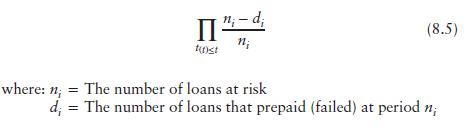

In [13]:
# Calculating Kaplan Meier Survivorship Table

NAR = [584717, 583409, 581269, 577547, 572270, 561475,550341]
Events = [1308, 2131, 3702, 5250,5752, 6375, 6738]

There are remaining after Loan age 6 -> 550341 #Given

In [14]:
import warnings
import numpy as np
warnings.filterwarnings('ignore')

df = pd.DataFrame(columns=['Loan Age' ,'Number at Risk','Events', 'Censored', 'Hazard','Survival', 'Cum. Survival'])
df['Loan Age'] = range(len(NAR))
df['Number at Risk'] = NAR
df['Events'] = Events

for i in range(len(NAR)):
    
    if i == (len(NAR)-1):
        df['Censored'][i] = 4039
        
    else:
        df['Censored'][i] = df['Number at Risk'][i] - df['Number at Risk'][i+1] - df['Events'][i]
        
        
    df['Hazard'][i] = ((df['Events'][i]))/(df['Number at Risk'][i])
    
    df['Survival'][i] = 1 - df['Hazard'][i]
    
    df['Cum. Survival'][i] = df['Survival'][i]
    
    if i > 0:
        
        df['Cum. Survival'][i] = df['Survival'][i] * (df['Survival'][i - 1])
                                                      

print(df.to_string(index=False))


 Loan Age  Number at Risk  Events Censored      Hazard  Survival Cum. Survival
        0          584717    1308        0  0.00223698  0.997763      0.997763
        1          583409    2131        9  0.00365267  0.996347      0.994119
        2          581269    3702       20  0.00636882  0.993631      0.990002
        3          577547    5250       27  0.00909017   0.99091      0.984599
        4          572270    5752     5043   0.0100512  0.989949       0.98095
        5          561475    6375     4759    0.011354  0.988646      0.978709
        6          550341    6738     4039   0.0122433  0.987757      0.976542


### 3.5 The Cox Proportional Hazards Model:  

The Cox model is semi-parametric in that it does not assume an underlying
error structure  
  
                            𝜆(t;Zi) = 𝜆0(t)rt(t)  

𝜆0(t) = an unspecified baseline hazard function

Risk Score:
  
                             ri(t) = exp𝛽Zi(t)


Given two subjects with covariate vectors Z1 and Z2, the hazard ratio is given by:  
        
        𝜆0(t)exp(𝛽Z1(t))/𝜆0(t)exp(𝛽Z2(t)) = exp(𝛽(Z1(t)- Z2(t)))

### 3.6 Data Types:

#### 3.6.1 Categorical Variable:  
A categorical variable is a descriptive variable like loan purpose or property
type. A categorical variable may have more than one possible value. For
example, loan purpose may be purchase, refinance, or cash-out refinance. It
may also be binary in nature such as yes or no.  

#### 3.6.2 Continuous Variable:  
A continuous variable is one that takes on an indiscrete value. Examples
of continuous variables include: loan-to-value ratio, the borrower’s credit
score, and loan balance.

#### 3.6.3 Time-Dependent Variable:  
A time-dependent variable is a variable whose value changes as a function
of time. The value of the hazard function is dependent on the current value
of the variable rather than its value at the beginning of the study t = 0.

### 3.7 Case Study: FHLMC 30-YEAR Loan Level Prepayment Analysis

Dataset: 
External Time Dependent Variables
— The housing turnover rate. Turnover
— Seasonal factors; Seasonals

Internal Time Dependent
— Loan age; Seasoning
— The current mortgage rate vs. the borrower’s note rate. Borrower Incentive

Categorical Variables
— Loan Purpose; Loan purpose consists of three levels:
• Purchase
• Refinance
• Cash-out Refinance


#### 3.7.1 Borrower Economic Incentive to Refinance

The borrower’s economic incentive to refinance refers to the borrower’s option to prepay and is likely the first internal time dependent predictor variable encountered by the analyst

-> Ratio of the present value of the current mortgage annuity to that of the new mortgage annuity.  
  
        Annuity ratio = [(1 + Note rate)^−n/(1 + Mortgage rate)^−n]

-> Log ratio of the borrower’s note rate to the prevailing or lagged mortgage rate.  
  
            Log ratio incentive = ln[Note rate/Mortgage rate]

-> The spread between the borrower’s note rate and the prevailing or lagged mortgage rate.
  
            Incentive spread = Note rate − Mortgage rate

In [15]:
#Data From Fannie Mae's website
import pandas as pd
columns = ['Credit Score', '1st Payment Date', '1st Time Homebuyer', 
           'Maturity Date', 'MSA', 'MI', 'Number of Units', 'Occupancy Status',
           'CLTV', 'Og. DTI', 'Og. UPB', 'LTV', 'Og. Interest rate', 'Channel', 
           'PPM Flag', 'Amortization Type', 'Property State', 'Property Type', 
           'Postal Code', 'Loan Sequence Number', 'Loan Purpose',
           'Original Loan Term', 'Number of Borrowers', 'Seller Name', 
           'Servicer Name', 'Super Conforming Flag',
           'Pre-HARP Loan Sequence Number','Program Indicator',
           'Harp Indicator','Property Valuation Method',
           'Interest only (I/0) Indicator']   

"html = http://www.freddiemac.com/fmac-resources/research/pdf/user_guide.pdf "

df = pd.read_table('sample_orig_2013.txt', index_col=False, sep = '|', names = columns)

df.head()

,Credit Score,1st Payment Date,1st Time Homebuyer,Maturity Date,MSA,MI,Number of Units,Occupancy Status,CLTV,Og. DTI,...,Original Loan Term,Number of Borrowers,Seller Name,Servicer Name,Super Conforming Flag,Pre-HARP Loan Sequence Number,Program Indicator,Harp Indicator,Property Valuation Method,Interest only (I/0) Indicator
0,796,201304,9,204303,39820.0,0,1,P,74,48,...,360,2,Other sellers,Other servicers,NaN,NaN,9,NaN,9,N
1,778,201303,9,204302,10420.0,0,1,P,78,36,...,360,1,Other sellers,Other servicers,NaN,NaN,9,NaN,9,N
2,791,201304,9,202803,16974.0,0,1,P,67,32,...,180,2,Other sellers,Other servicers,NaN,NaN,9,NaN,9,N
3,737,201303,9,204302,33700.0,0,1,P,117,999,...,360,2,Other sellers,Other servicers,NaN,F07Q40056913,9,Y,9,N
4,792,201304,9,202803,24260.0,0,1,P,47,26,...,180,2,Other sellers,Other servicers,NaN,NaN,9,NaN,9,N


In [16]:
#Borrower Economic Incentive to Refinance
# We consider mortgage rates to be National Monthly Average Mortgage Rates in 2013 -> 4%
import numpy as np
interest_rates = df['Og. Interest rate']
I_spread = [x - 4 for x in interest_rates]
Log_incentive = [np.log(x/4) for x in interest_rates]


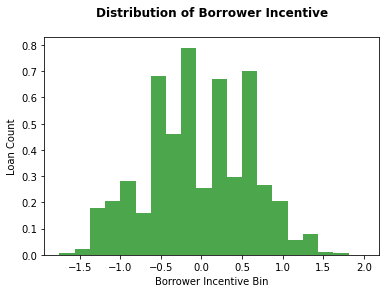

In [17]:
num_bins = 20
import matplotlib.pyplot as plt   
n, bins, patches = plt.hist(I_spread, num_bins, 
                            density = 1, 
                            color ='green',
                            alpha = 0.7)
  
plt.xlabel('Borrower Incentive Bin')
plt.ylabel('Loan Count')
  
plt.title('Distribution of Borrower Incentive\n',fontweight ="bold")
  
plt.show()

# With the right Data can do a lot of predictive calculations

#### 3.7.2 Loan Seasoning

Housing Turnover -> 
  
    Turnover = Annual single-family home sales/Owner-occupied housing stock

The ebb and flow of the housing turnover rate is affected by economic and social factors:  
-> Reloacation  
-> Changes in Home Prices  
-> Family Formation and Break Up  

The Mortgage Seasoning Ramp The baseline hazard (𝜆0(t)) defines the turnover rate.

#### 3.7.3 Seasonality

Seasonality is an example of an external time dependent variable that is
modeled as a categorical factor rather than a continuous variable.
#### Figure from the book

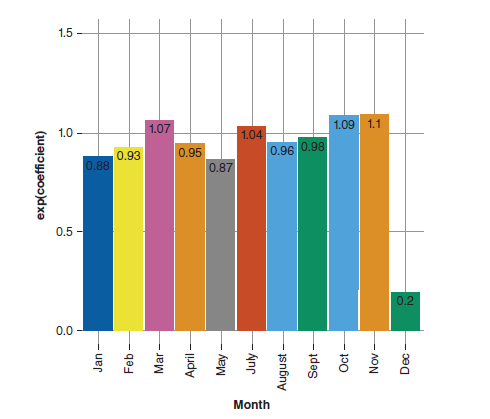

#### 3.8 Survival Analysis - Modeling Loan Cohorts

Once the investor has controlled for the influence of loan age, borrower incentive, and seasonality, the next task is to determine which loan cohorts
may be modeled together.

#### 3.8.1 Loan Purpose

Counter({'N': 26910, 'P': 15055, 'C': 8035})


<BarContainer object of 3 artists>

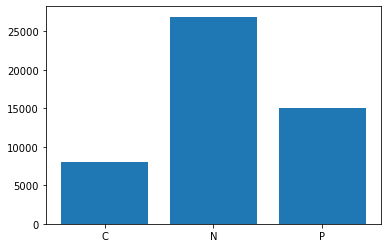

In [18]:
from collections import Counter
x = Counter(df['Loan Purpose'])
print(x)

plt.bar(x.keys(), x.values())
#
#-> P = Purchase
#-> C = Refinance - Cash Out
#-> N = Refinance - No Cash Out
#-> R = Refinance - Not Specified
#-> 9 = Not Available
# Anova studies can also be done

With Cox’s proportional harzards model and Residual analysis to explore and identify some the fundamental drivers of mortgage prepayment rates. The model employed is semi-parametric in the following ways:  
■ First, the model does not assume an underlying distribution of the error
terms.  
■ Second, the model assumes a constant hazard ratio over time.  
■ Third, in the case presented time dependent predictors are modeled using
regression splines.  

Disadvantages:  

■ The Cox model cannot extrapolate beyond the last observation used to
fit the model.  
■ Regression splines linearly interpolate data beyond the end points of the
spline—which may not be functionally correct.

# Chp.4 The Predictive Prepayment Model

The predictive model presented in this chapter is parametric

Drawbacks:  
-> There is a risk of “overfitting” the model to the data.  
-> Predictions outside the training data space may not be reliable.  

Qualities:  
-> A parametric model greatly reduces the risk of overfitting the data.  
-> The model will perform reliably (extrapolate) outside the training data used to fit its parameters.  

Statistical standpoint, a prepayment model, or any predictive
model, must be “parsimonious and robust,” meaning that the model should
use the fewest predictor variables (parsimonious) to explain as much of the
variation in the data as possible (robust).  

    𝜆(t) = [Turnover × Loan seasoning × Seasonality]

Borrower Incentive:  
    
    BI = [Incentive × Burnout]  

Functionally, the model is:
    
    SMM = 𝜆(t) + BI

#### 4.1 Turnover:  
The investor may choose to model turnover either as a function of predictor
variables or simply assume a long-term average turnover rate.  

The Bond Lab® prepayment model assumes an average turnover rate of 6%, which
translates to an SMM of 0.5143%.

#### 4.2 Loan Seasoning:
The function is a multiplier on the estimated turnover rate and given by:  

        f(LoanAge) = 𝛼 − 𝛽 × exp(−𝜃×LoanAge)

𝛼 = The function’s asymptote  
𝛽 = The intercept  
𝜃 = The point of maximum curvature  



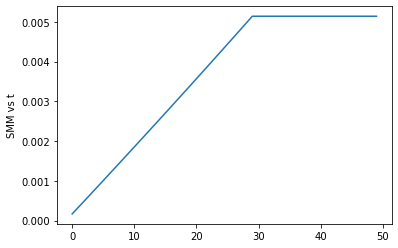

In [19]:
Y = []
for t in range(50):
    Y.append(SMM(t))

import matplotlib.pyplot as plt

plt.plot(Y)
plt.ylabel("SMM vs t")
plt.show()

In [20]:
# Calculating Loan Seasoning Parameteres
#Function can be different for different SMMs
t1 = 0
t2 = int(input("Enter Term in Months: "))

beta = 1 - (SMM(t1)/SMM(t2))

alpha = SMM(10000000) # very large number

y = (1 - (1 - 0.06)**(1/12))/15 # Same Slope throughout

#The point at which the seasoning ramp is rising most steeply (y), 
# Depends on data ; x -> month at which it rises

x = 30

theta = -(np.log((alpha - y)/beta))/x

print("beta : " +  str(beta) + "\ntheta : " + str(theta))

Enter Term in Months: 30
beta : 0.9675638297238213
theta : 0.17687117354308046


#### 4.3 Seasonality:

    Seasonality = 1 + 𝛼 × sin((𝜋/4)*[Month + 𝜃 - 3])

𝛼 = tuning parameter setting the function’s maximum value 
𝜃 = tuning parameter setting the point at which the function reaches its maximum value

In [21]:
# Calculating Seasonality Parameteres
month = int(input("Enter The Month: "))

seasonality = 1 + alpha* np.sin((np.pi/4) * (month + theta -3))

print("seasonality at t : " +  str(seasonality))

Enter The Month: 30
seasonality at t : 1.0030980662512297


#### 4.4 Borrower Incentive to Refinance:

Bond Lab Borrower Incentive Function
        
      Borrower incentive function = arctan ( [x + 𝜋] × 𝛽[ 𝜂 − arctan(x)/𝜋])

x = borrower incentive
𝛽 = an integer that defines the slope of the response function
𝜂 = a numeric parameter that defines the location of the response
function
To Study the intricacies of the Borrower Incentive Function read Book.

    Borrower incentive = 𝜃1 + 𝜃2 arctan([x + 𝜋] × 𝛽[(𝜂 − arctan(x))/𝜋])
    
                    𝜃1 = (max(SMM) + min(SMM))/2

                                    and

                    𝜃2 = (max(SMM) − min(SMM))/𝜋

#### 4.5 Borrower Burnout:

The term burnout refers to the evolution of the composition of borrowers within a pool of securitized mortgage loans.
-> Refinance velocity: borrower’s response to a given refinancing incentive
-> Adverse selection: Refers to a borrower’s refinancing cost.

Observations based on FHLMC loan level Data:

New: The loan’s age is less than or equal to 36 months. A new borrower
exhibits a stronger propensity to refinance given that he has recently
closed a loan and may require little preparation in terms of documentation.

Moderate: The loan’s age is between 37 and 60 months. The moderately seasoned borrower exhibits a weaker propensity to refinance. The borrower may simply be unaware of refinancing opportunities or reluctant to assemble the required paperwork need to document the loan throughout the underwriting process.

Seasoned: The loan’s age is greater than 60 months. The seasoned borrower exhibits the weakest propensity to refinance. The longer the borrower maintains his loan, the greater his reluctance to refinance.

Finally we can check the burnout to be 

    burnout = exp( 𝛽1×LoanAge + 𝛽2×Incentive)

    where, Incentive = Max[(Note rate − Mtg. rate), Start value]

#### Borrower Incentive Function also can be determined using Burnout

    Borrower incentive = (BIfast payer × Burnout) + (BIslow payer × [1 − Burnout])

BIfast payer = Fast payer S-curve    
BIslow payer = Slow payer S-curve  
Burnout = Burnout variable  

Application of the Prepayment Model

The burnout variable includes a time element, which reduces the need to stratify the model over loan age. By tuning three models to loan purpose, the overall predictive ability of the combined models improves by as much as 0.8% CPR.

Additional Variables Influencing Mortgage Prepayment Rates:

■ Home price inflation/deflation
■ Credit score
■ Debt-to-income ratio
■ Loan-to-value ratio
■ Origination channel
■ Loan size
■ Loan term
■ Note rate type—fixed, adjustable, hybrid

Each of these variables can cause greater or less refinancing friction for the borrower. For example, a borrower with a lower credit score, all else equal, will experience a higher refinancing cost in terms of rate, documentation, and mortgage insurance than a borrower with a higher credit score.